# Problem statement 

- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

- The 10 classes are as follows:  
  - 0 => T-shirt/top
  - 1 => Trouser
  - 2 => Pullover
  - 3 => Dress
  - 4 => Coat
  - 5 => Sandal
  - 6 => Shirt
  - 7 => Sneaker
  - 8 => Bag
  - 9 => Ankle boot

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 


# Import libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import  tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# About Dataset 


* Test Datasource : https://github.com/umbertogriffo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load _training data--> source Kaggle
train_data = pd.read_csv('/content/drive/My Drive/Kaggle/fashion-mnist_train.csv')

In [ ]:
# Data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
# load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/umbertogriffo/Fashion-mnist-cnn-keras/master/Dataset/fashion-mnist_test.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


# Data Visualization

In [ ]:
i = np.random.randint( low = 0, high = 59000 )
print (i)

6109


Text(0.5, 1.0, 'image at ith index')

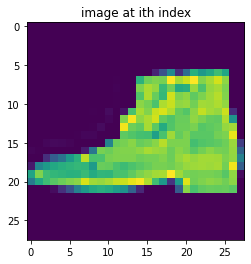

In [ ]:
# Let's view some images!
i = np.random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(train_data.iloc[i,1:].values.reshape(28,28))  # reshape and plot the image
plt.title("image at ith index")
#plt.imshow( train_data[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

In [ ]:
label = train_data[i,0]
label

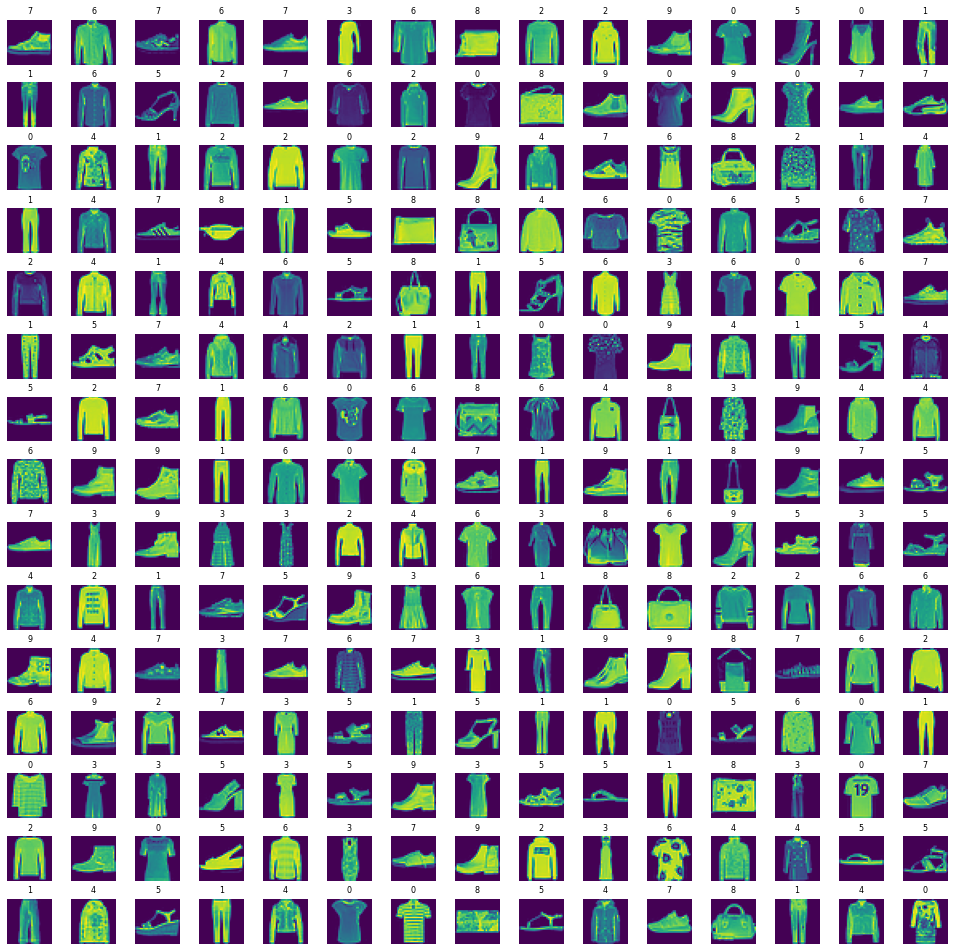

In [ ]:
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
l = 15 # lenght of image
w = 15 # width of image
fig, axes = plt.subplots(l,w,figsize =(17,17) )

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

#n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, l * w): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, 59999)
    # read and display an image with the selected index    
    axes[i].imshow( train_data.iloc[index,1:].values.reshape((28,28)) )
    axes[i].set_title(train_data.iloc[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Build Model 

In [ ]:
X_train = train_data.iloc[:, 1:]/255  # normalizing the column value
y_train = train_data.iloc[:, 0]    # lables, 0-9
X_test = test_data.iloc[:,1:]/255
y_test = test_data.iloc[:,0]

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train,X_validation, y_train, y_validation = train_test_split(X_train,y_train, random_state = 42, test_size= 0.3)

In [ ]:
type(X_validation)

* CNN model needs 4 dimension data i.e. number of sample, (length, breadth, hight) of image. Hence if not given it'll show below error while running ```model.fit()``` method
* **ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=4, found ndim=2.**

In [ ]:
print(f'X_train shape is 2D:{X_train.shape},\n y_train shape is 2D:{y_train.shape} ')

X_train shape is 2D:(42000, 784),
 y_train shape is 2D:(42000,) 


In [ ]:
# unpack the tuple, shape returns tuple, (x,y), where  x  is rows, y is column 
X_train = X_train.values.reshape(X_train.shape[0], *(28, 28, 1)) # X_train.shape[0] reperesent number of rows

In [ ]:
X_test = X_test.values.reshape(X_test.shape[0], *(28,28,1))

* pandas.dataframe doesn't have a built-in reshape method,but you can use '''.values''' to access the underlying numpy array object and call reshape on it:


In [ ]:
X_validation = X_validation.values.reshape(X_validation.shape[0], *(28,28,1))

In [ ]:
print(f' X_train shape is 4D:{X_train.shape} \n X_train shape is 4D:{X_train.shape},\n X_validation shape is 4D:{X_test.shape}')

 X_train shape is 4D:(42000, 28, 28, 1) 
 X_train shape is 4D:(42000, 28, 28, 1),
 X_validation shape is 4D:(10000, 28, 28, 1)


In [ ]:
cnn = tf.keras.models.Sequential()
# Conv2D('number of filters', ('size of filters), activation = 'relu', input_shape)
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (28,28,1)))
# add pooling layer for downsampling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# add flatten layer for converting 2D feature map/matrix into vectors, so that it can feed to Dense/fullyconnected layers
cnn.add(tf.keras.layers.Flatten())

# fully connected layers 
cnn.add(tf.keras.layers.Dense(units = 64, activation='relu'))  # here 64 refers 64 neurons 

# output layer
cnn.add(tf.keras.layers.Dense(units = 10, activation='softmax'))


In [ ]:
# model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
# compile/optimize model
cnn.compile(optimizer = 'Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
# model fit
epoch_history = cnn.fit(X_train, y_train, batch_size= 128, epochs = 40, validation_data=(X_validation, y_validation))

Epoch 1/82
168/168 [==============================] - 3s 16ms/step - loss: 0.1702 - accuracy: 0.9369 - val_loss: 0.3685 - val_accuracy: 0.9005
Epoch 2/82
168/168 [==============================] - 3s 15ms/step - loss: 0.1037 - accuracy: 0.9618 - val_loss: 0.4257 - val_accuracy: 0.8997
Epoch 3/82
168/168 [==============================] - 3s 15ms/step - loss: 0.0693 - accuracy: 0.9734 - val_loss: 0.4510 - val_accuracy: 0.9059
Epoch 4/82
168/168 [==============================] - 2s 15ms/step - loss: 0.0535 - accuracy: 0.9795 - val_loss: 0.4752 - val_accuracy: 0.8997
Epoch 5/82
168/168 [==============================] - 2s 15ms/step - loss: 0.0469 - accuracy: 0.9823 - val_loss: 0.5213 - val_accuracy: 0.8997
Epoch 6/82
168/168 [==============================] - 2s 15ms/step - loss: 0.0385 - accuracy: 0.9855 - val_loss: 0.5467 - val_accuracy: 0.8984
Epoch 7/82
168/168 [==============================] - 3s 15ms/step - loss: 0.0314 - accuracy: 0.9889 - val_loss: 0.5853 - val_accuracy: 0.9023

val_accuracy = 0.9032
training_ accuracy = 0.9975

# Model Evaluation

In [ ]:
# evaluate model on test data
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5836 - accuracy: 0.9077


[0.5836135149002075, 0.9077000021934509]

* Accuracy is 0.9077 on test data which is close to validation accuracy (val_accuracy = 0.9032), which means model is not overfitting data completely 

In [ ]:
epoch_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

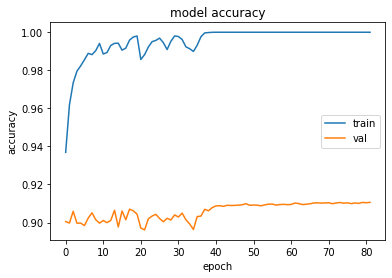

In [ ]:
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Model Prediction

* ```np.argmax(cnn.predict(X_test), axis=-1)```
use for multiclass classification, since ```model.predict_classess``` is decapricated  

In [ ]:
y_predict = np.argmax(cnn.predict(X_test), axis=-1)
print(y_predict.shape)
print(type(y_predict))

(10000,)
<class 'numpy.ndarray'>


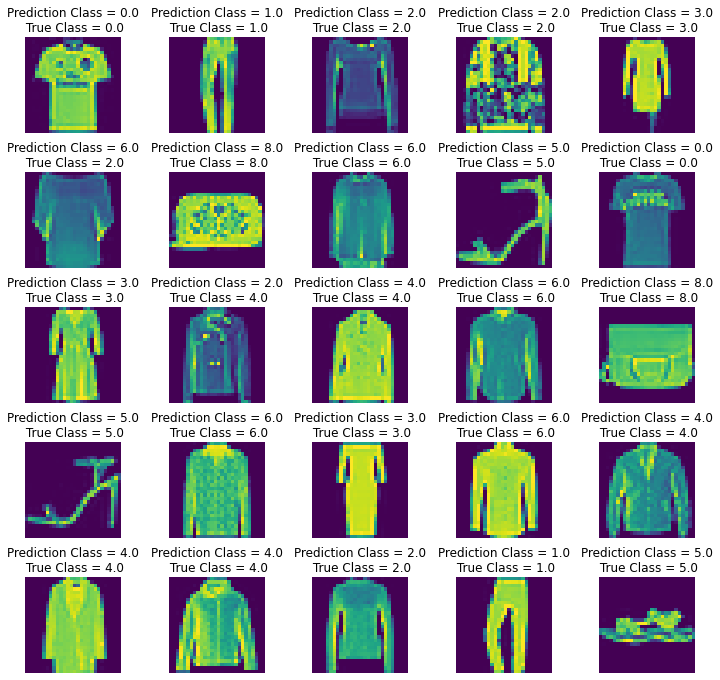

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()  

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

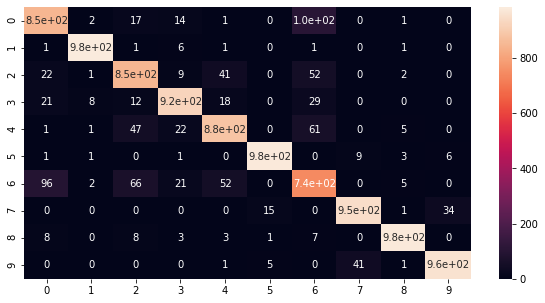

In [ ]:
plt.figure(figsize=(10,5))
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
# 0 => T-shirt/top
# 6 => shirt   
#misclassfication is high

In [ ]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       990
           1       0.98      0.99      0.99       996
           2       0.85      0.87      0.86       976
           3       0.92      0.91      0.92      1012
           4       0.88      0.87      0.87      1020
           5       0.98      0.98      0.98      1000
           6       0.74      0.75      0.75       987
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.98      1011
           9       0.96      0.95      0.96      1008

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

